In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

###Import the data.

In [11]:
df_P = pd.read_csv(filepath_or_buffer = 'D3_all.csv', parse_dates = [[1,2]], index_col = False)  
df_P = df_P.set_index('YYYY/MM/DD_HH:MM:SS')
df_P.drop(df_P.columns[[0,2,3,4,5,6,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]], axis=1, inplace=True)

#df_P = pd.io.parsers.read_csv(filepath_or_buffer = 'D3_all.csv', parse_dates = [0], index_col = 0)
print df_P[:5]

                       UnixTime  e2v03  Temp    Rh
YYYY/MM/DD_HH:MM:SS                               
2014-07-07 21:08:01  1404767281    101  44.6  10.0
2014-07-07 21:08:22  1404767302    101  44.7  10.0
2014-07-07 21:08:43  1404767323    101  44.6  10.0
2014-07-07 21:09:04  1404767344    101  44.7  10.1
2014-07-07 21:09:24  1404767364    101  44.7  10.2


In [ ]:
df_P.drop(df_P.columns[[4]], axis=1, inplace=True)

#df_P = pd.io.parsers.read_csv(filepath_or_buffer = 'D3_new_features.csv', parse_dates = [0], index_col = 0)
print df_P[:5]

#If you have already written a new file after cleaning a row, import it before cleaning the next row.

In [3]:
df_P = pd.io.parsers.read_csv(filepath_or_buffer = 'clean_CAMP.csv',index_col = 0)

#Start here if this is the first run through the file.

####Enter the column number you'd like to evaluate.

In [30]:
#col = raw_input('Enter the column you would like to inspect: ')
col = 'Rh'

####Define a function, called unique_column_values, that displays every unique value in the selected column.

In [31]:
def unique_column_values(df,column_name):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    print column_name, df[column_name].unique()


####Call the unique_column_values function for column of the data that you want to evaluate. Look at the data and make sure there aren't any obvious outliers.


In [32]:
unique_column_values(df_P,col)

Rh [ 10.   10.1  10.2  10.3  10.4  10.6  10.5  10.7  10.8  10.9  11.   11.1
  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.1  12.2  12.6  12.9
  13.   13.1  13.2  13.3  13.4  13.5  13.6  13.7  12.8  12.7  20.2  19.6
  19.3  19.   18.8  18.2  18.6  19.1  18.   17.9  18.3  19.4  19.8  18.5
  17.7  17.4  17.6  17.3  17.8  18.1  17.5  17.2  17.1  17.   16.9  16.6
  16.4  16.3  16.   15.9  15.8  15.7  15.6  16.7  16.8  16.2  16.1  16.5
  18.4  18.7  18.9  19.2  19.5  19.7  19.9  20.   20.1  20.4  20.5  21.
  21.6  22.1  22.6  22.4  22.7  23.1  23.2  23.4  23.6  23.9  24.1  24.3
  24.4  24.   22.8  22.3  22.   21.7  21.5  21.8  22.2  22.9  23.   23.3
  24.2  24.5  24.8  24.9  25.2  25.4  25.5  25.8  25.9  26.1  26.2  26.4
  26.5  26.6  26.8  27.   27.1  27.2  27.3  27.4  27.5  27.6  27.7  27.8
  27.9  28.   28.1  28.2  28.3  28.4  28.5  28.6  28.7  28.8  28.9  29.
  29.1  29.2  29.4  29.5  29.6  29.7  29.8  29.9  30.   30.3  30.5  30.6
  30.7  30.9  31.2  31.6  31.9  32.2  31.7  31.8  

####Define a function, column_plot, that gives you a plot of all of the data on one column. Look for outliers.

In [33]:
def column_plot(df,column_name):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    print column_names
    #look at every unique value in each column sto make sure they look reasonable
    #column_num is the number of the column that the user picks
    df[column_name].plot(marker = '.',figsize = (20,10),legend = True)
    #, xlim=['2014-08-19 00:00:00', '2014-08-21 00:00:00']

####Call the function, column_plot, using the column of the data that you want to plot.

Index([u'UnixTime', u'e2v03', u'Temp', u'Rh'], dtype='object')


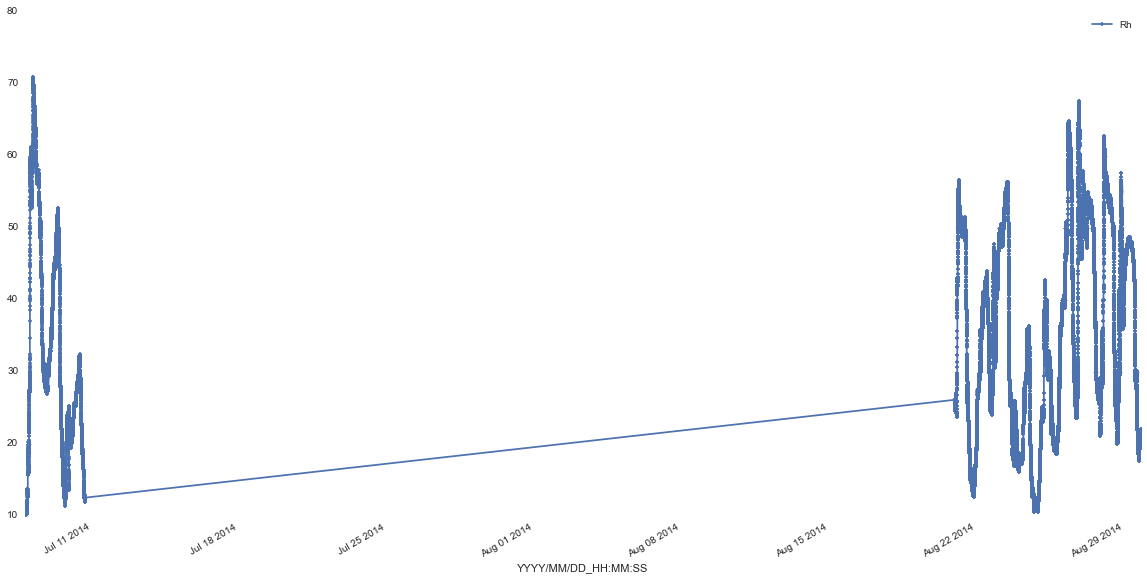

In [34]:
column_plot(df_P,col)

#You can stop here and move on the the next column if you don't see any outliers!!!!

####Define a function, remove_data_above, that removes data above a specified value.

In [17]:
def remove_data_above(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] < n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Define a function, remove_data_below, that removes data below a specified value.

In [34]:
def remove_data_below(df,column_name,n):

    #df.keys generates a list containing all of the column names
    column_names = df.keys()
    #remove values below/above n from the matrix
    df = df[df[column_name] > n]
    #print unique values to make sure the bad ones got removed
    print column_name, df[column_name].unique()
    #return the dataframe, so that it can be used to change df_K
    return df

####Call the function, remove_data_above, to remove data above a certain value, by entering (df_K,col,value).

In [23]:
df_P = remove_data_above(df_P,col,180)

e2v03 [101 100 102 103 104 106 105 107 108  99 109 111 112  98  97  96  95 110
  94  93 115  92  91  90  89  88  87  86  85 113 114 122 126 127 124 120
 118 121 116  83  80  79  77  78  81  84  82 130 134 131 117 119 123 125
 129 128 132 133  76  75  74  73  72  71  70  69  67  66  65  68  64  63
  62  61  60  59  58  57  56  55 135 136 137 138 139 140 141 142 143 144
 145 147 146 148 152 153 150 149 175 166 160 156 173 176 164 154 161 151
 165 168 155 157 162 159  54  53  52  51  50  49  48  47  46  45  44  43
 158 163]


####Call the function, remove_data_below, to remove data below a certain value, by entering (df_K,col,value).

In [59]:
df_P = remove_data_below(df_P,col,0)

Temp [ 40.2  40.1  40.3  40.4  40.5  40.6  40.8  40.9  41.   41.2  41.1  41.3
  41.4  41.5  41.6  41.7  41.8  41.9  42.   42.1  40.7  40.   39.9  39.8
  39.7  39.6  39.5  39.4  39.3  39.2  39.1  39.   38.9  38.8  38.7  38.6
  38.5  38.4  38.3  38.2  38.1  38.   37.9  37.8  37.7  37.6  37.5  37.4
  37.3  37.2  37.1  37.   36.9  36.8  36.7  36.6  36.5  36.4  36.3  36.2
  36.1  36.   35.9  35.8  35.7  35.6  35.5  35.4  35.3  35.2  35.1  35.
  34.9  34.8  34.7  34.6  34.5  34.4  34.3  34.2  34.1  34.   33.9  33.8
  33.7  33.6  33.5  33.4  33.3  33.2  33.1  33.   32.9  32.8  32.7  32.6
  32.5  32.4  32.3  32.2  32.1  32.   31.9  31.8  31.7  31.6  31.5  31.4
  31.3  31.2  31.1  31.   30.9  30.8  30.7  30.6  30.5  30.4  30.3  30.2
  30.1  30.   29.9  29.8  29.7  29.6  29.5  29.4  29.3  29.2  29.1  29.
  28.9  28.8  28.7  28.6  28.5  28.4  28.3  28.2  28.1  28.   27.9  27.8
  27.7  27.6  27.5  27.4  27.3  27.2  27.1  27.   26.9  26.8  26.7  26.6
  26.5  26.4  26.3  26.2  26.1  26.   25.9  25.8

####Replot the data to see how well the cleaning worked.

Index([u'UnixTime', u'e2v03', u'Temp', u'Rh', u'Wind'], dtype='object')


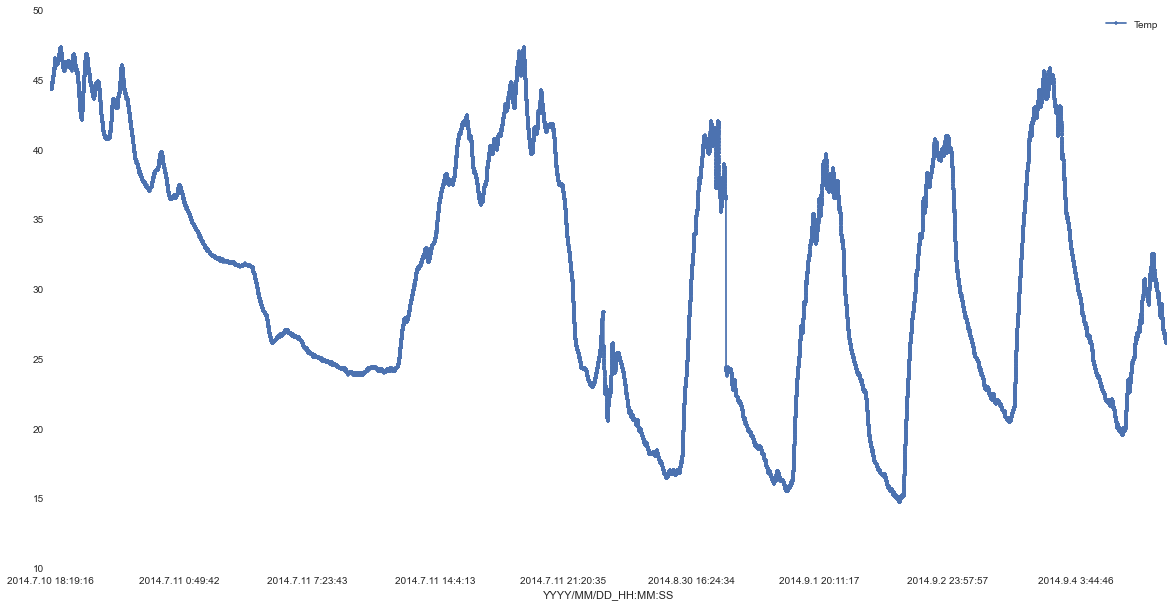

In [341]:
column_plot(df_P,col)

#Go back and clean the data again if necessary.

###Otherwise, write the new dataframe to a file. Do this after cleaning each row, so that if you make a mistake with a row, you don't have to reclean all of the other rows.

In [35]:
df_P.to_csv(path_or_buf = 'D3_clean.csv')